<a href="https://colab.research.google.com/github/ekaterga/stc510/blob/main/Module3EssentialsCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
crime_data = pd.read_csv('crimestat.csv')

<ipython-input-73-4147e2bfcbdf>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('crimestat.csv')


In [74]:
temp_data = pd.read_csv('temperature.csv')

In [75]:
crime_data['OCCURRED ON'] = pd.to_datetime(crime_data['OCCURRED ON']).dt.date

In [76]:
temp_data['datetime'] = pd.to_datetime(temp_data['datetime']).dt.date

The temperatures were in Kelvin and I want them in Celsius.

In [111]:
temp_data['Phoenix'] = temp_data['Phoenix'] + 273.15

In [112]:
avg_temp_per_day = temp_data.groupby('datetime')['Phoenix'].mean().reset_index()

In [113]:
crime_count = crime_data['OCCURRED ON'].value_counts().reset_index()
crime_count.columns = ['datetime', 'Crime_Count']

In [114]:
merged_data = pd.merge(crime_count, avg_temp_per_day[['datetime', 'Phoenix']], on='datetime', how='inner')


In [122]:
merged_data.rename(columns={'Phoenix': 'Temperature'}, inplace=True)
merged_data.rename(columns={'datetime': 'Date'}, inplace=True)

In [123]:
print(merged_data)

           Date  Crime_Count  Temperature
0    2017-11-01          246    20.583333
1    2017-06-01          244    30.333333
2    2017-07-01          235    34.458333
3    2017-05-19          233    22.541667
4    2017-10-01          232    27.000000
..          ...          ...          ...
743  2015-12-06          123    13.041667
744  2015-12-25          121    11.416667
745  2016-11-24          119    15.583333
746  2016-12-25          108     7.541667
747  2017-11-17           27    20.083333

[748 rows x 3 columns]


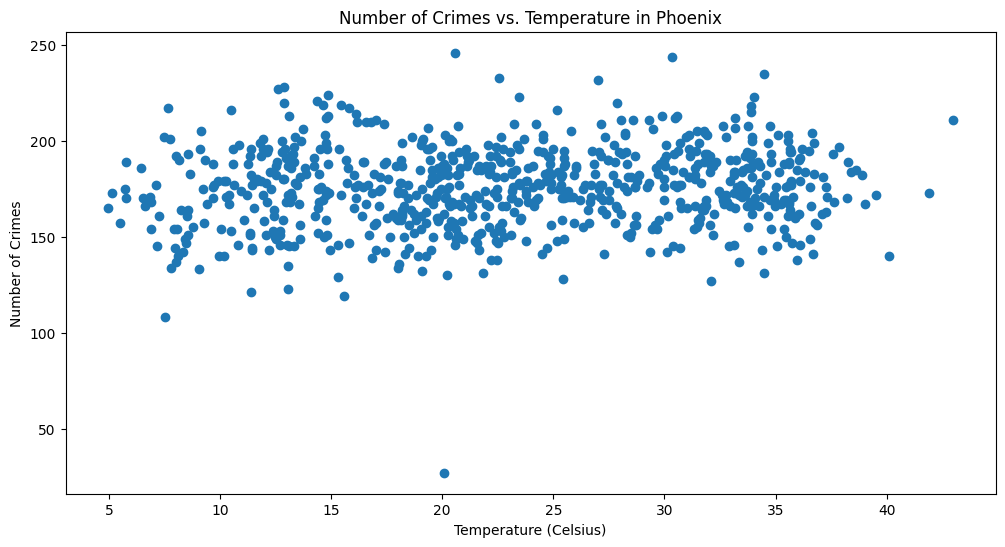

In [125]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Temperature'], merged_data['Crime_Count'])
plt.title('Number of Crimes vs. Temperature in Phoenix')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Crimes')
plt.show()

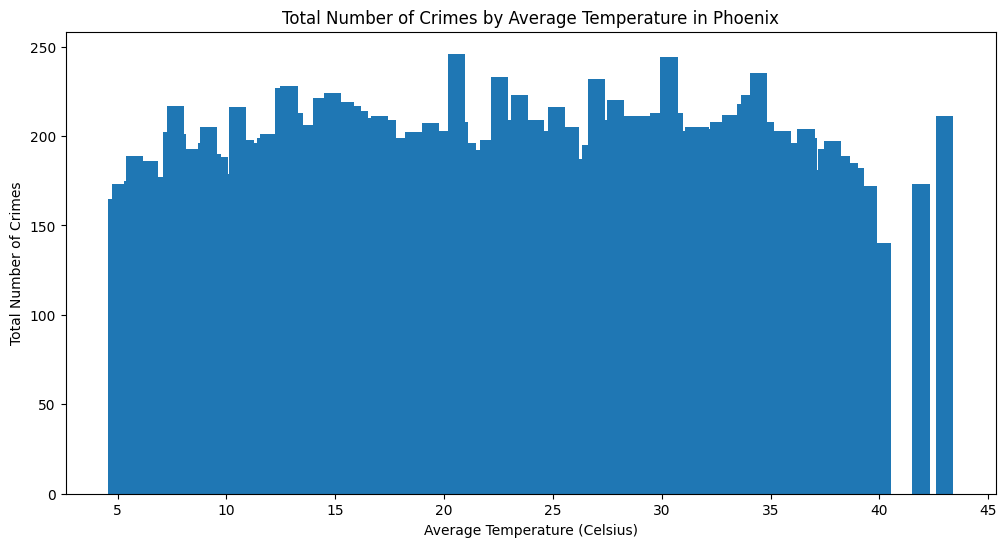

In [126]:
plt.figure(figsize=(12, 6))
plt.bar(merged_data['Temperature'], merged_data['Crime_Count'])
plt.title('Total Number of Crimes by Average Temperature in Phoenix')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Total Number of Crimes')
plt.show()

In [121]:
merged_data.to_csv('merged_data.csv', index=False)